## <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Gonzalo Lavigna

***
## Filtrado


In [1]:
#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
import scipy.io as sio
import scipy.fftpack as sc
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./Ejercicio1-1-Part-1.png" align="center" width="75%" /> 
<img src="./Ejercicio1-1-Part-2.png" align="center" width="75%" /> 


   b) Corrobore su respuesta mediante la simulación computacional


Ceros del numerador=[-0.5+0.8660254j -0.5-0.8660254j]


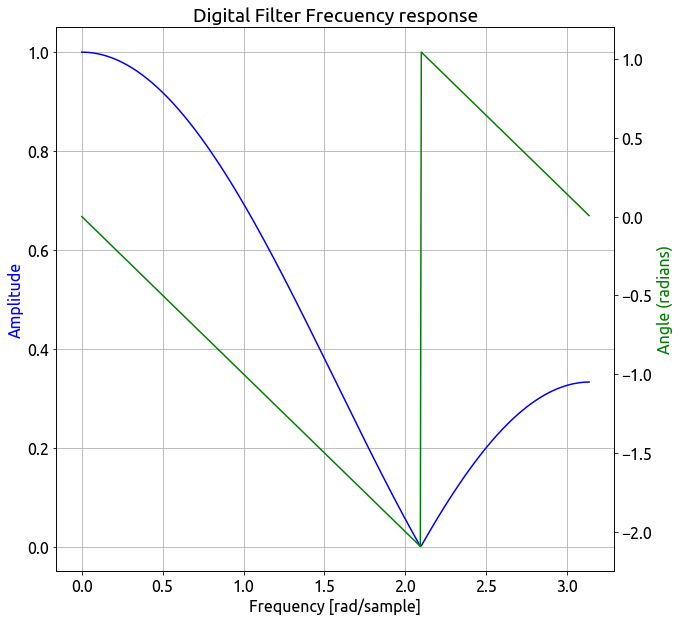

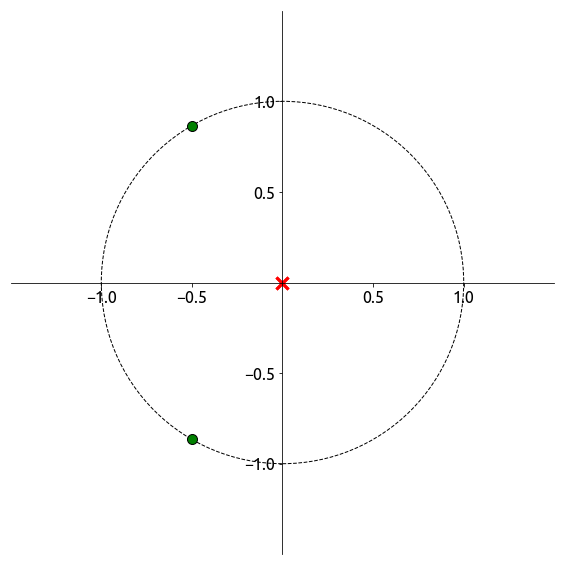

In [4]:
#N = 3 Filtro promediador
N = 3
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)
# b = [1/3,1/3,1/3]
#Como es un FIR el denominador para freqz es 1
a = np.array([1,0,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots()
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure()
z,p,k=zplane(b,a)



<img src="./Ejercicio-1-2-Part-1.png" align="center" width="50%" /> 
<img src="./Ejercicio-1-2-Part-2.png" align="center" width="50%" /> 

Ceros del numerador=[ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j]


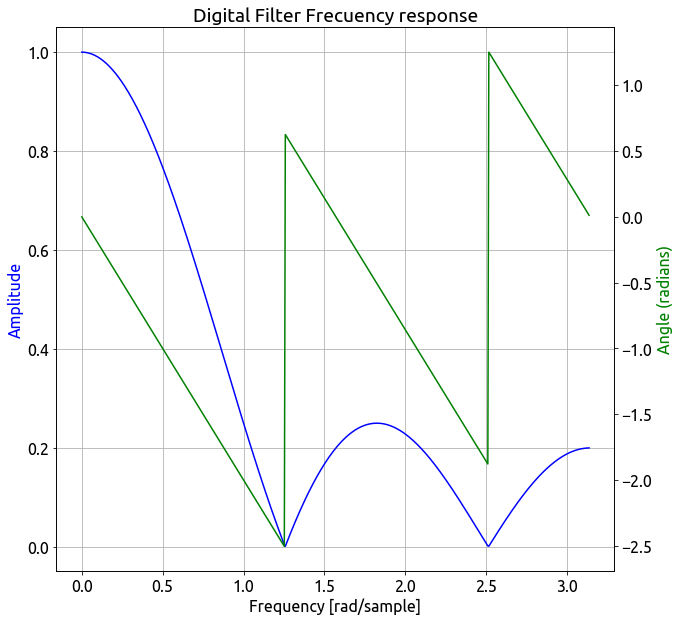

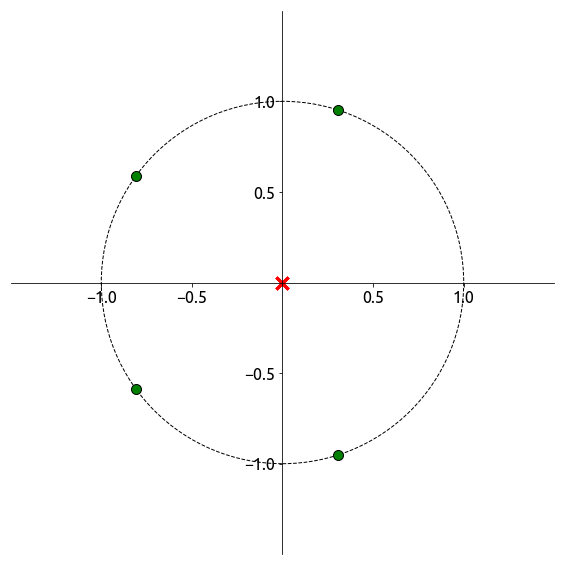

In [5]:
#N = 5 Filtro promediador
N = 5
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)
# b = [1/5,1/5,1/5,1/5,1/5]
#Como es un FIR el denominador para freqz es 1
a = np.array([1,0,0,0,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots()
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure()
z,p,k=zplane(b,a)

<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./Ejercicio-2.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


Ceros del numerador=[1.]


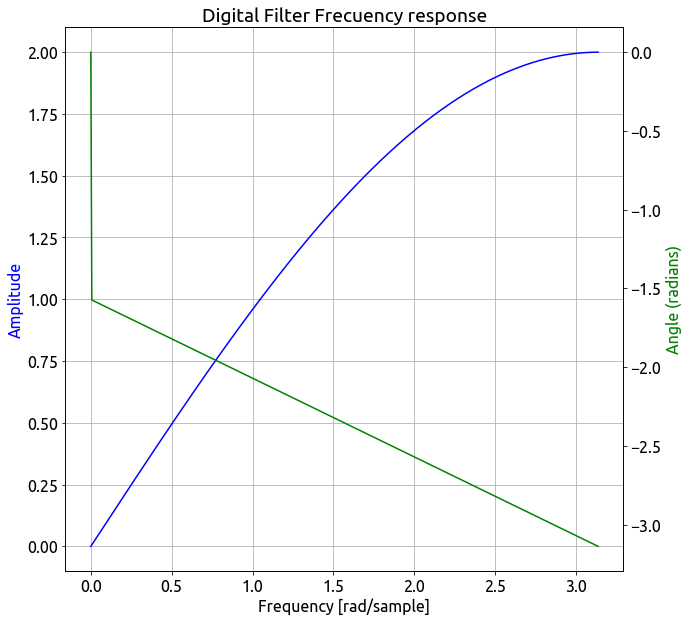

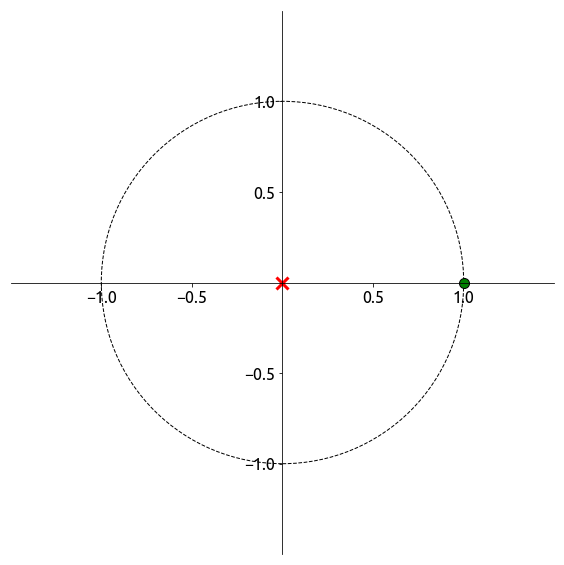

In [6]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Filtro Pasaaltos
b = np.array([-1,1])
#Como es un FIR el denominador para freqz es 1
a = np.array([1,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots()
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure()
z,p,k=zplane(b,a)


<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./Ejercicio-3-1-Part-1.png" align="center" width="75%" /> 
<img src="./Ejercicio-3-1-Part-2.png" align="center" width="75%" /> 


   b) Corrobore su respuesta mediante simulación computacional


Ceros del numerador=[ 1. -1.]


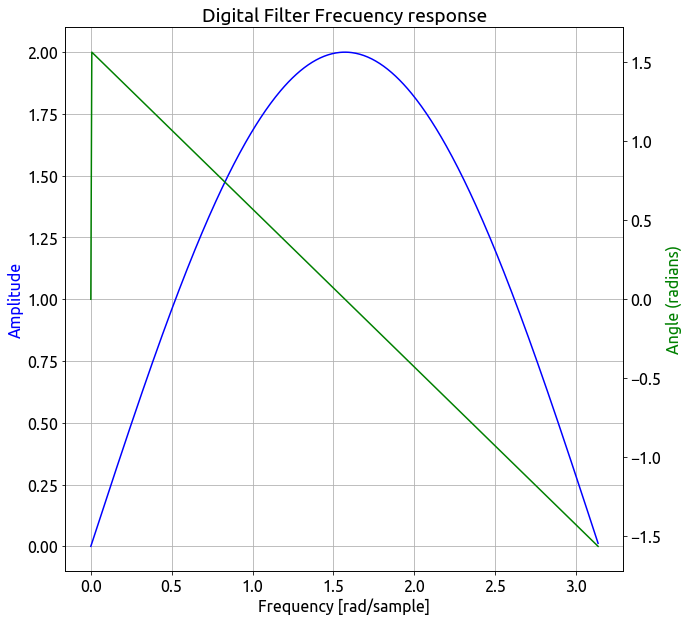

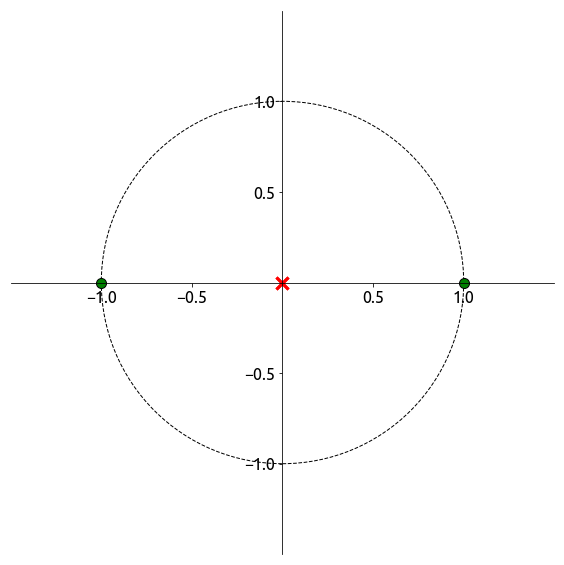

In [7]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Para N = 2
b = np.array([1,0,-1])
#Como es un FIR el denominador para freqz es 1
a = np.array([1,0,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots()
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure()
z,p,k=zplane(b,a)



<img src="./Ejercicio-3-2.png" align="center" width="75%" /> 

Ceros del numerador=[-1.00000000e+00+0.j  8.32667268e-17+1.j  8.32667268e-17-1.j
  1.00000000e+00+0.j]


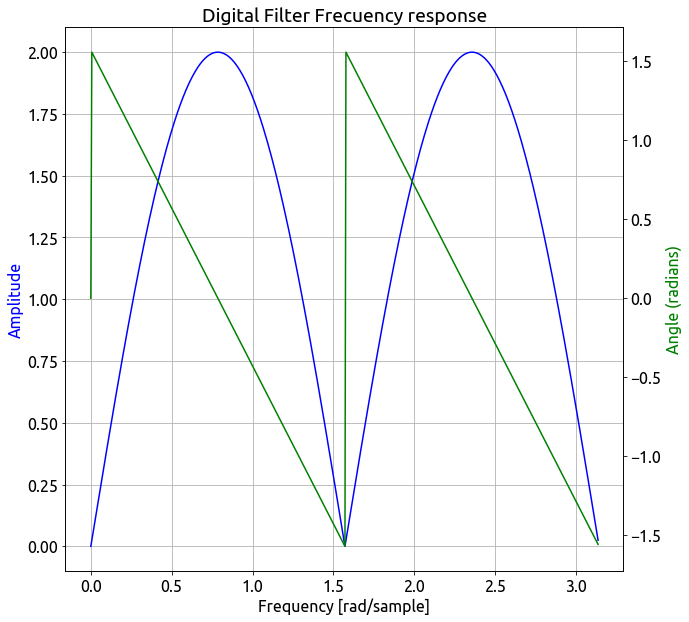

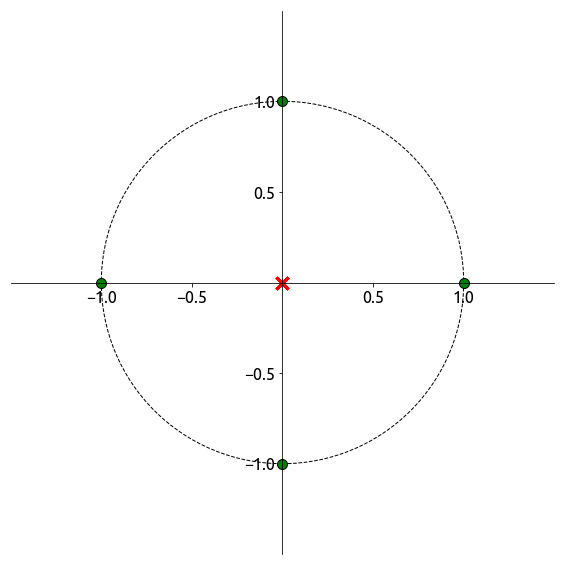

In [8]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Para N = 4
b = np.array([1,0,0,0,-1])
#Como es un FIR el denominador para freqz es 1
a = np.array([1,0,0,0,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots()
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure()
z,p,k=zplane(b,a)



<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [9]:
# Defina la plantilla del filtro

fs0 = 0.2 # fin de la banda de detenida 0
fc0 = 1 # comienzo de la banda de paso #Me hubiera gustado poner 0.8Hz pero colapsa el pyfda.
fc1 = 30 # fin de la banda de paso
fs1 = 35 # comienzo de la banda de detenida 1



b) ¿Cómo obtuvo dichos valores? 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Los filtros los formamos como la cascada de 1 filtro pasaalto y 1 filtro pasabajo.
        La siguiente imagen muestra un filtro con banda de paso de 20 a 25 Hz. En el siguiente vemos que el pico de la forma de onda queda desfasado debido a que no dejamos pasar ciertas altas frecuencia y ademas no entran en fase.
</div>

<img src="./Slice_baja_frecuencia_20_25_HZ.png" align="center" width="50%" /> 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Ademas si probamos con algo que tenga una banda de paso de 30 a 35 Hz, vemos que la componente de alta frecuencia. Queda alineada, lo cual estamos buscando y no perder informacion de dicho pulso 
</div>

<img src="./Slice_baja_frecuencia_30_35_HZ.png" align="center" width="50%" /> 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con respecto a la zona de frecuencia , se observo una zona del ECG indicada sin tener ruido de baja frecuencia y se hizo la siguiente FFT, en dicho caso se quizo probar con filtros hasta 0.8 Hz aproximadamente pero colapso el pyfda.
    Tambien se hizo un proceso iterativo con el filtro pasa alto ya que al ser de orden alto, el pyfda colapsa. Por eso nos quedamos con la siguiente platilla
</div>

<img src="./Espectro_zona_sin_baja_frecuencia.png" align="center" width="100%" /> 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si bien perdemos algo de baja frecuencia, es imposible sacarla completamente y en algo nos afecta. Tal vez si bajabamos mas la frecuencia, pero el pyfda no nos dejo para un FIR Pasa Alto
</div>

<img src="./Zona-sin-ruido-baja-frecuencia.png" align="center" width="100%" /> 
<img src="./Zona-sin-ruido-baja-frecuencia-zoom.png" align="center" width="100%" /> 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para una zona con ruido de baja frecuencia, se observa que tambien lo sacamos, observar que la señal satura debido al ruido de baja frecuencia, obviamente esta parte no la podemos sacar. En Azul se ve la original, la verde es solo con el filtro pasalto y con la roja el filtro pasabajo.
</div>

<img src="./zona-con-ruido-de-baja-frecuencia.png" align="center" width="100%" /> 
<img src="./zona-con-ruido-de-baja-frecuencia-zoom.png" align="center" width="100%" /> 



c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño

  
  
  
  

Para el primer filtro se eligio una opcion de pasabajo y despues pasarlo por un pasaalto. A continuacion se ponen las platillas del pyfda. Se quizo hacer de 40 db de atenuacion pero el Pyfda no podia cerrar el calculo y poner 0.1 db en la banda paso. Menos de esto no podriamos ir porque sino arruinariamos parte que nos interesa del filtro que es la baja frecuencia del latido.
Para el pasabajo como tenemos menos constraint de que el filtro colapse le bajamos la banda de atenuacion, tambien hay que reconocer que podemos atenuar ya que no esta cerca de nada que nos interesa.
Tambien le bajamos a la banda de paso para no seguir propagando el error.
Para el pasabajos nos dio 690 TAPS y para el pasa altos nos dio 2634 taps con un warning del pyfda.
Se sacan capturas ya que es equivalente a que hacerlo graficando.

<img src="./High-Pass-equirripple.png" align="center" width="50%" /> 
<img src="./LOW-PASS-EQUIRRIPPLE.png" align="center" width="50%" /> 

<img src="./Highpass-equirriple.png" align="center" width="100%" /> 
<img src="./Lowpass-equirriple.png" align="center" width="100%" /> 





Se disenño con la misma arquitectura se desarrollo un filtro pasaltos y luego un filtro pasabajo. Tener en mente que se hizo c
con la ventana de blackman harris. En este filtro no tuvimois problema para bajarle la frecuencia de paso a 0.8Hz la banda de paso
Tampoco se observo ripple en la banda de paso.
Esto parecio bastante bueno ya que con el otro no podiamos cerrar el ripple.
Tambien se dejo el filtro pasabajo con la mismas especificaciones y se observo que atenuaba mucho mas de lo pedido en la banda de atenuacion.
OTra cosa que se vio es que por poco sobrepasa la banda de atenuacion.

<img src="./High-Pass-window.png" align="center" width="50%" /> 
<img src="./Low-Pass-window.png" align="center" width="50%" /> 

<img src="./Highpass-window-HF.png" align="center" width="100%" /> 
<img src="./lowpass-window-HF.png" align="center" width="100%" /> 


El IIR Eliptico Pasabajo termino dando la banda de paso con 11 TAPS solamente (Con los otros necesitamos como 695 TAPS), con respecto a eso parece maravilloso.
Para el Pasaalto nos da lo siguiente con solo 4 TAPS, lo cual comparado con los 3.600 coeficientes que necesitaba el FIR es mucha diferencia.
Tener en cuenta que se cumplio la plantilla perfectamente. Parece sencillo porque el polo tiene una capacidad de atenuar en poca freceuncia mucho mejor que un FIR, eso sucede cuando las banda son muy restrictivas.

<img src="./HIGH-PASS-IIR-ELIPTIC.png" align="center" width="50%" /> 
<img src="./LOW-PASS-IIR-ELIPTIC.png" align="center" width="50%" /> 

<img src="./HIGH-PASS-IIR-ELIPTIC-HF.png" align="center" width="100%" /> 
<img src="./LOW-PASS-IIR-ELIPTIC-HF.png" align="center" width="100%" /> 

El problema que tenemos es con la fase en la cual el IIR para algo en tiempo real nos termina haciendo daño la fase y en esta señal importa mucho la fase.
Si podemos pasar el IIR devuelta con el filtfilt de signal el problema de fase desaparece.

<img src="./HIGH-PASS-IIR-ELIPTIC-FASE.png" align="center" width="100%" /> 
<img src="./LOW-PASS-IIR-ELIPTIC-FASE.png" align="center" width="100%" /> 


Ahora vamos a poner el segundo filtro que es uno de Bessel dee lo que recuerdo de filtros analogicos es el que mejor
fase tiene. Claramente este filtro no puede cumplir por el PYFDA la banda de paso. Tiene poca pendiente asi que dudo que pueda darnos la atenuacion que necesitamos. 
Para que converja tuvimo que relegar mucho la respuesta en frecuencia.
Con respecto al pasalto sigue siendo bueno y dando resultados acordes.

<img src="./HIGH-PASS-IIR-BESSEL.png" align="center" width="50%" /> 
<img src="./LOW-PASS-IIR-BESSEL.png" align="center" width="50%" /> 

<img src="./HIGH-PASS-IIR-BESSEL-HF.png" align="center" width="100%" /> 
<img src="./LOW-PASS-IIR-BESSEL-HF.png" align="center" width="100%" /> 

La fase del pasabajos da mucho mejor que en el eliptico, parece mejor si queremos hacer algo en tiempo real igual la atenuacion o es mucho y no se cuanto nos puede llegar a aportar.

<img src="./HIGH-PASS-IIR-BESSEL-FASE.png" align="center" width="100%" /> 
<img src="./LOW-PASS-IIR-BESSEL-FASE.png" align="center" width="100%" /> 



d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



In [10]:
import scipy.io as sio

def get_ECG_TP4_MAT():
    #Cargo el archivo con la informacion
    test = sio.loadmat('ECG_TP4.mat')
    ecg =test['ecg_lead'].flatten()    
    hb_p1 =test['heartbeat_pattern1'].flatten()   
    hb_p2 =test['heartbeat_pattern2'].flatten()   
    qrs_detections =test['qrs_detections'].flatten()   
    qrs_p1 =test['qrs_pattern1'].flatten()   
    
    return ecg,hb_p1,hb_p2,qrs_detections,qrs_p1

def plot_slice (slice_ecg,ecg_original,ecg_hp,ecg_hp_lp):
    ecg_slice       = ecg[slice_ecg[0]:slice_ecg[1]]
    ecg_hp_slice    = ecg_hp[slice_ecg[0]:slice_ecg[1]]
    ecg_hp_lp_slice = ecg_hp_lp[slice_ecg[0]:slice_ecg[1]]
    
    #Calculamos el vector para los tiempos
    N  = np.size(ecg_slice);
    tt = np.linspace(0,(N-1)*ts,N).flatten()
    plt.figure()
    line_hdls_1 = plt.plot(tt,ecg_slice,'b')
    line_hdls_2 = plt.plot(tt,ecg_hp_slice,'g')
    line_hdls_3 = plt.plot(tt,ecg_hp_lp_slice,'r')
    
    plt.xlabel('tiempo [segundos]')
    plt.ylabel('Amplitud [muestras]')
    #plt.show()


ecg,hb_p1,hb_p2,qrs_detections,qrs_p1 = get_ECG_TP4_MAT()

#Definimos la fs que es transversal a todo y tambien al ts
fs = 1000
ts = 1/fs

/home/glavigna/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


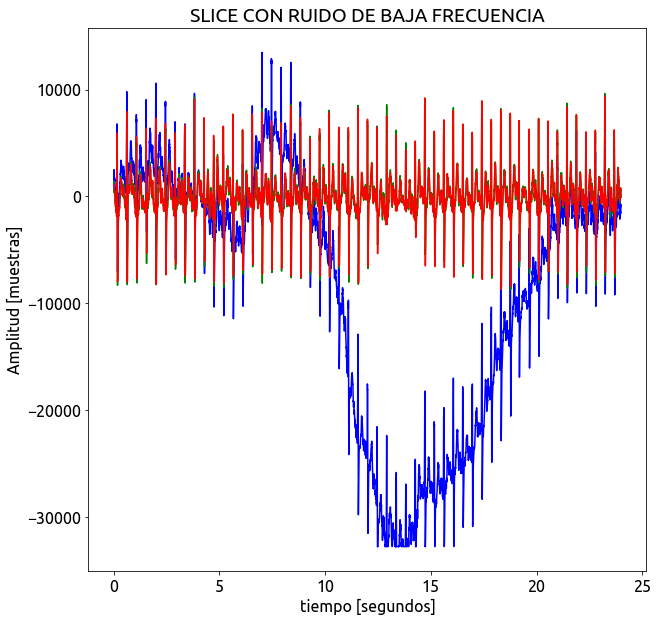

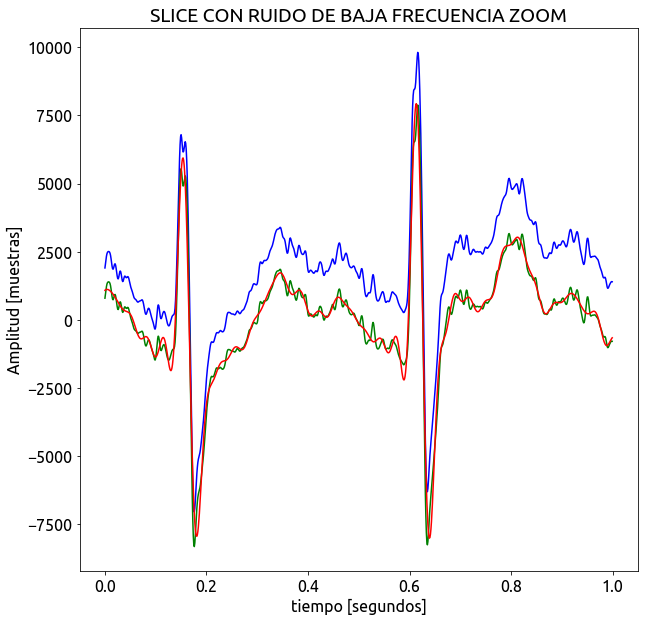

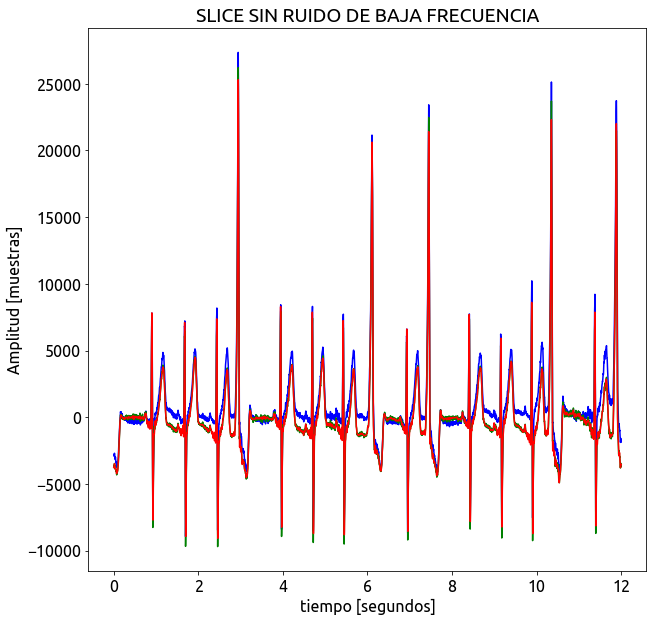

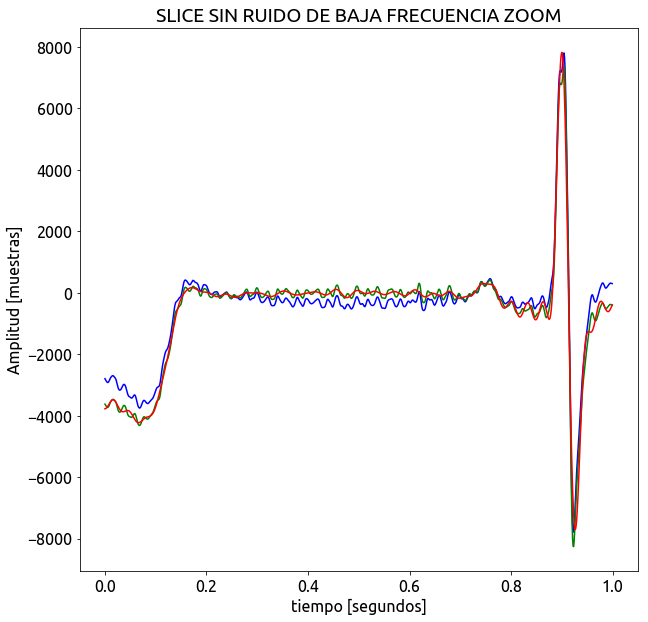

In [11]:
#Probamos el filtro FIR PASA BAJO Con Tecnica Equirriple
# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Cargamos el FIR PASA ALTOS
#Load high pass FIR
files = np.load('FIR_HIGHBAND.npz')
coefficient_hp=files['ba.npy']

#Load low pass FIR
files = np.load('FIR_LOWPASS.npz')
coefficient_lp=files['ba.npy']


b_hp = coefficient_hp[0].flatten()
a_hp = coefficient_hp[1].flatten()

b_lp = coefficient_lp[0].flatten()
a_lp = coefficient_lp[1].flatten()

#Filtramos con el HP
ecg_hp = signal.filtfilt(b_hp,a_hp,ecg)
#FIltramos la salida del filtrado del HP con el LP
ecg_hp_lp = signal.filtfilt(b_lp,a_lp,ecg_hp)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)


plot_slice(slice_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+1000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()



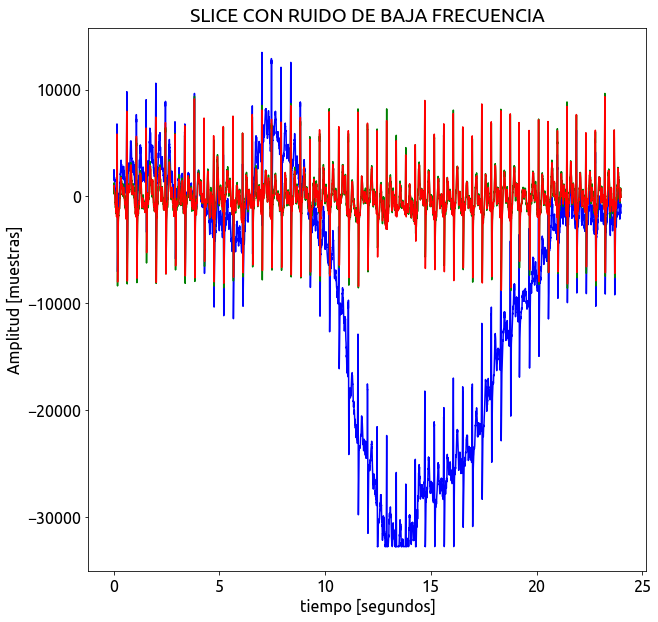

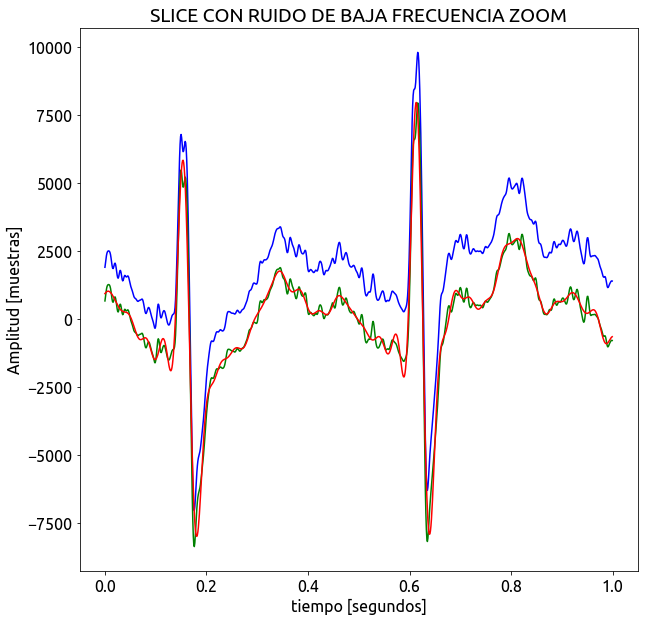

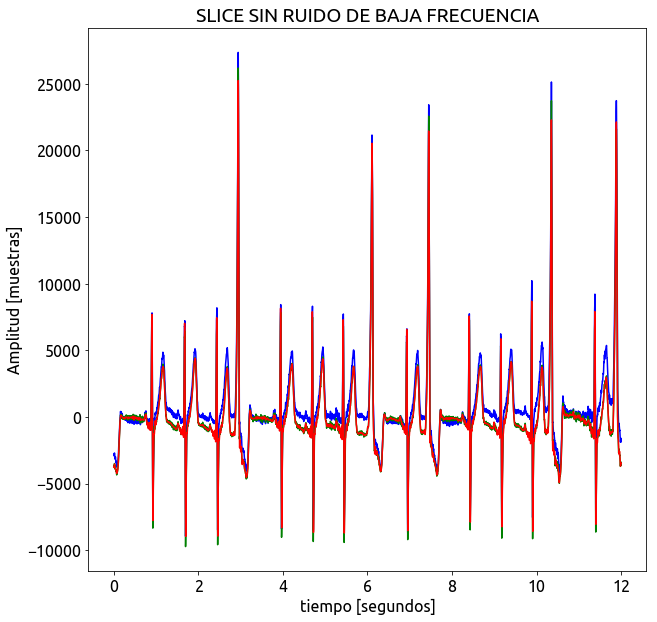

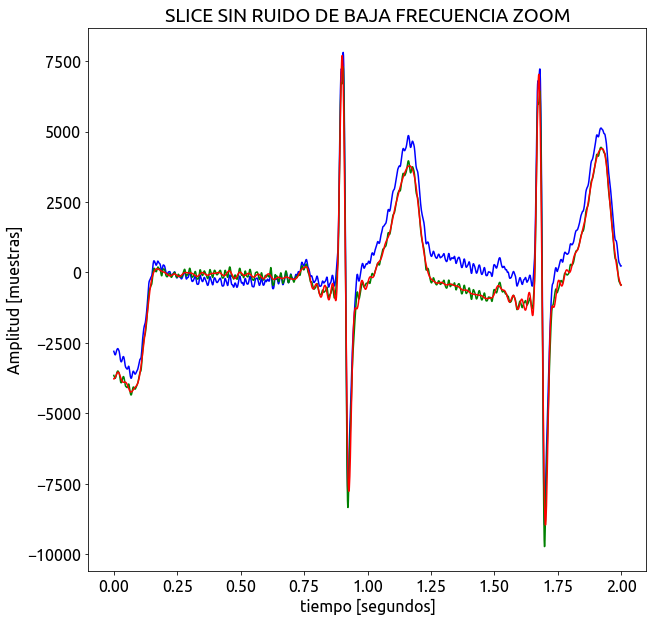

In [12]:
#Hacemos lo mismo con el filtro ventana
#Cargamos el FIR PASA ALTOS
#Load high pass FIR
files = np.load('FIR_HIGHBAND_WINDOW.npz')
coefficient_hp=files['ba.npy']

#Load low pass FIR
files = np.load('FIR_LOWPASS_WINDOW.npz')
coefficient_lp=files['ba.npy']


b_hp = coefficient_hp[0].flatten()
a_hp = coefficient_hp[1].flatten()

b_lp = coefficient_lp[0].flatten()
a_lp = coefficient_lp[1].flatten()

#Filtramos con el HP
ecg_hp = signal.filtfilt(b_hp,a_hp,ecg)
#FIltramos la salida del filtrado del HP con el LP
ecg_hp_lp = signal.filtfilt(b_lp,a_lp,ecg_hp)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)


plot_slice(slice_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

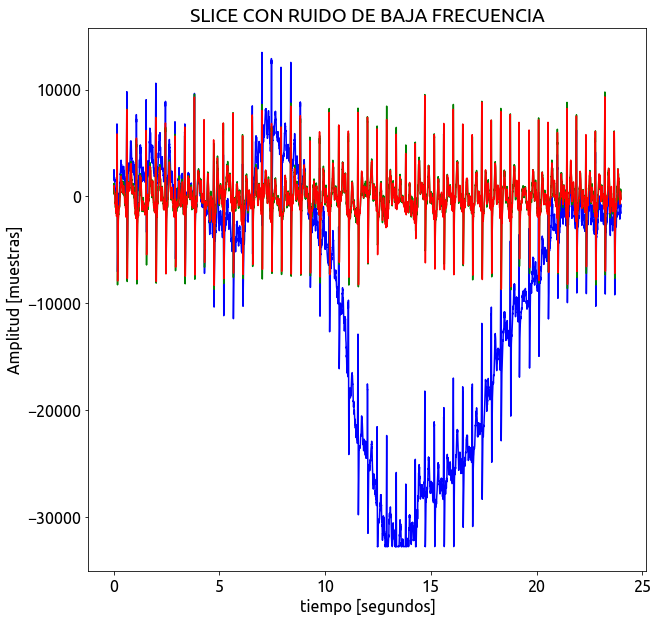

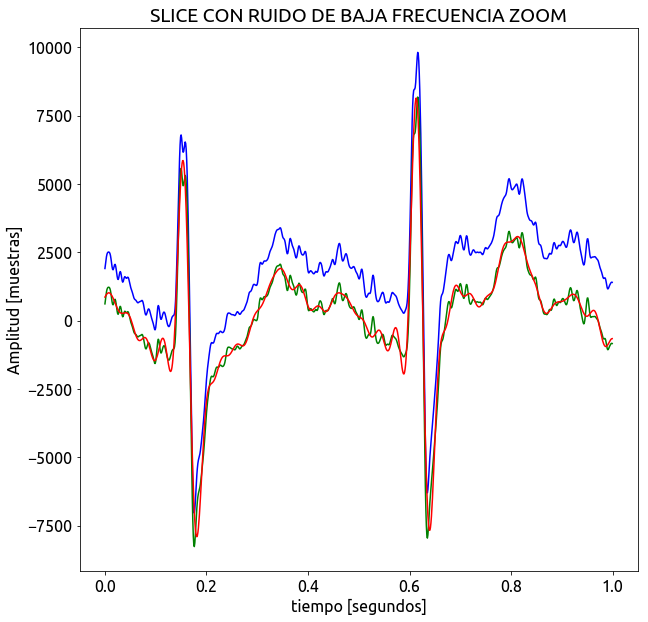

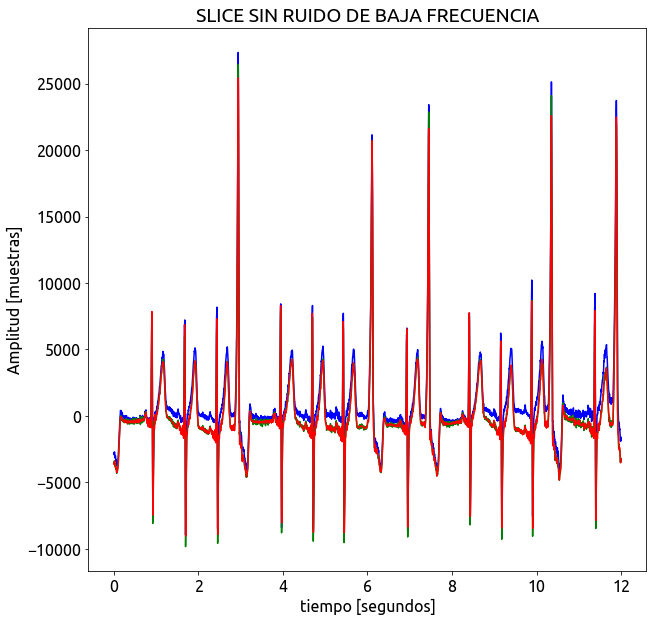

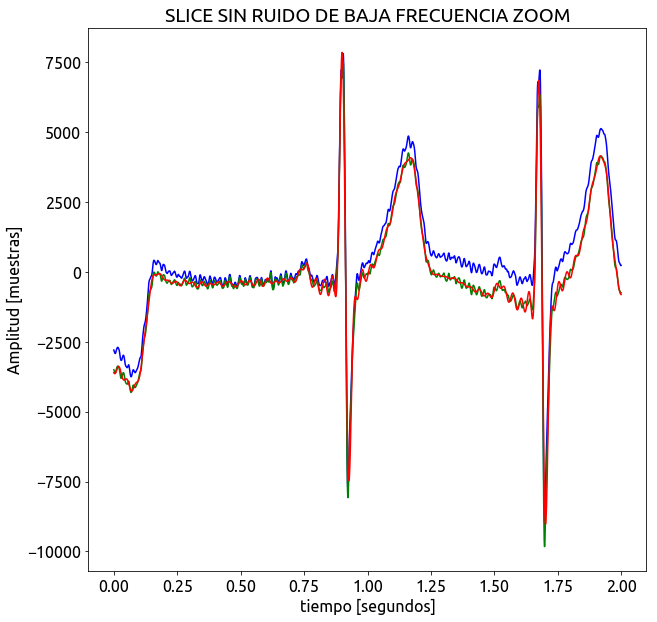

In [13]:
#Hacemos lo mismo con el filtro IIR usando FILTFILT lo cual acomoda la fase
#Cargamos el IIR PASA ALTOS
#Load high pass IIR
files = np.load('IIR_HIGHBAND.npz')
coefficient_hp=files['ba.npy']

#Load low pass IIR
files = np.load('IIR_LOWPASS.npz')
coefficient_lp=files['ba.npy']


b_hp = coefficient_hp[0].flatten()
a_hp = coefficient_hp[1].flatten()

b_lp = coefficient_lp[0].flatten()
a_lp = coefficient_lp[1].flatten()

#Filtramos con el HP
ecg_hp = signal.filtfilt(b_hp,a_hp,ecg)
#FIltramos la salida del filtrado del HP con el LP
ecg_hp_lp = signal.filtfilt(b_lp,a_lp,ecg_hp)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)


plot_slice(slice_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

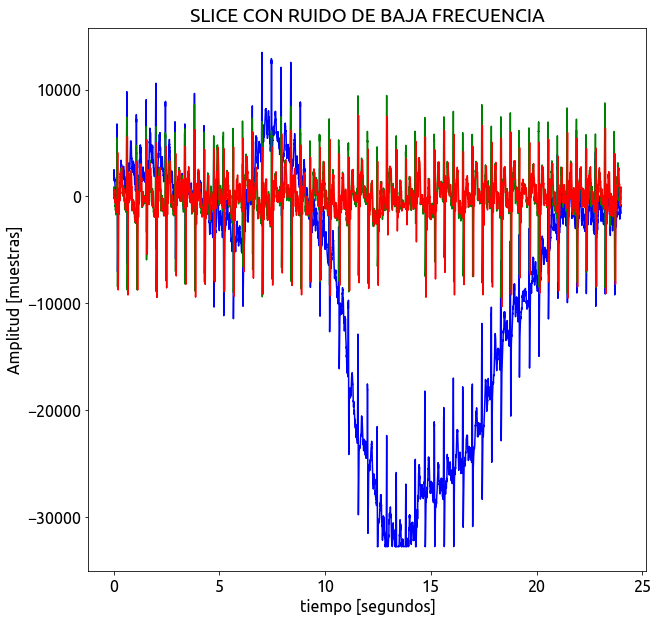

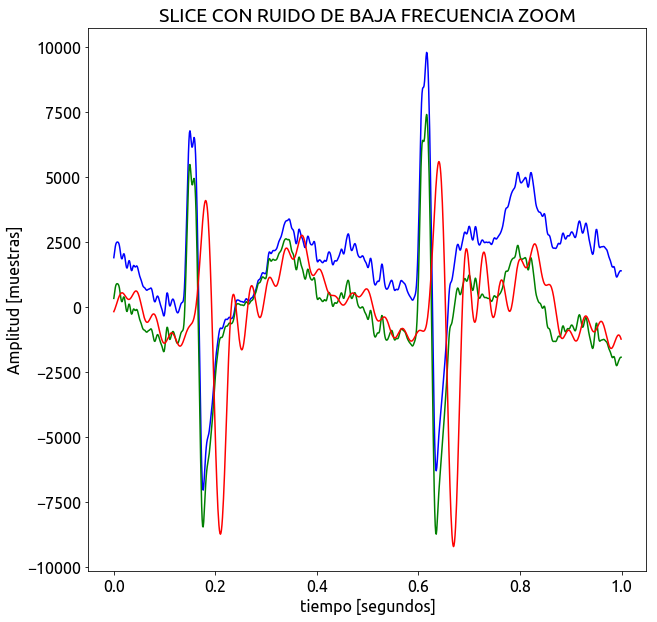

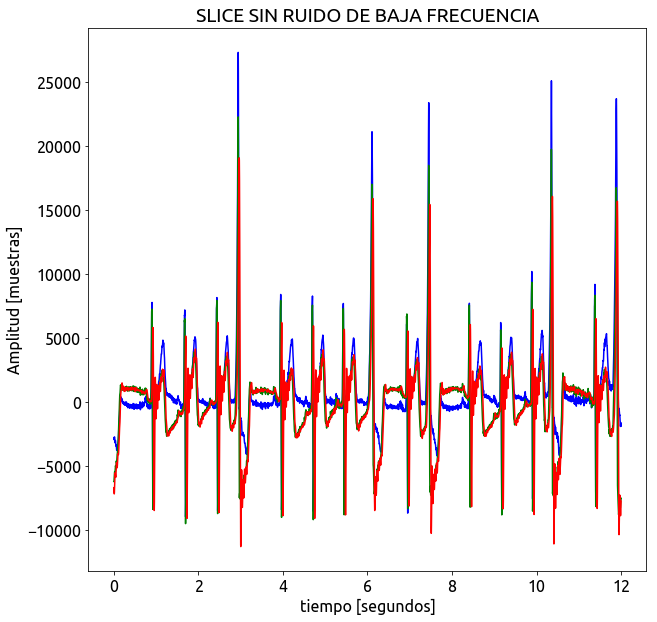

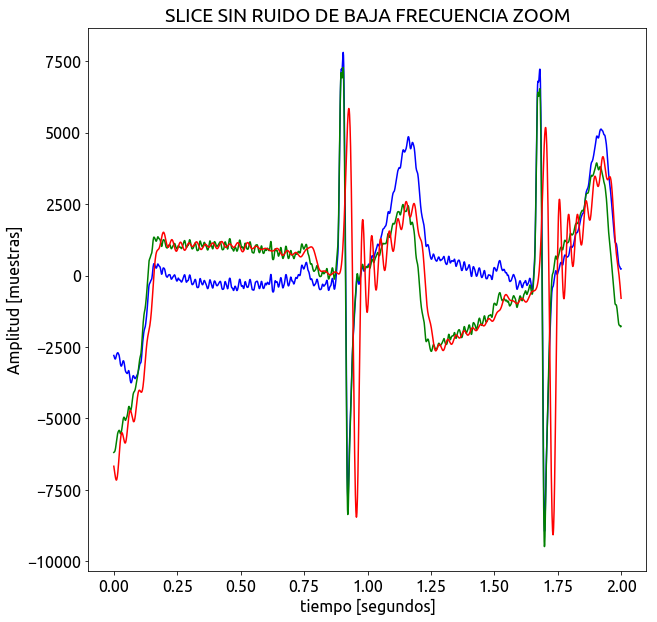

In [14]:
#Hacemos lo mismo con el filtro IIR usando LFILT lo cual no acomoda la fase
#Cargamos el IIR PASA ALTOS
#Load high pass IIR
files = np.load('IIR_HIGHBAND.npz')
coefficient_hp=files['ba.npy']

#Load low pass IIR
files = np.load('IIR_LOWPASS.npz')
coefficient_lp=files['ba.npy']


b_hp = coefficient_hp[0].flatten()
a_hp = coefficient_hp[1].flatten()

b_lp = coefficient_lp[0].flatten()
a_lp = coefficient_lp[1].flatten()

#Filtramos con el HP
ecg_hp = signal.lfilter(b_hp,a_hp,ecg)
#FIltramos la salida del filtrado del HP con el LP
ecg_hp_lp = signal.lfilter(b_lp,a_lp,ecg_hp)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)


plot_slice(slice_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro  en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

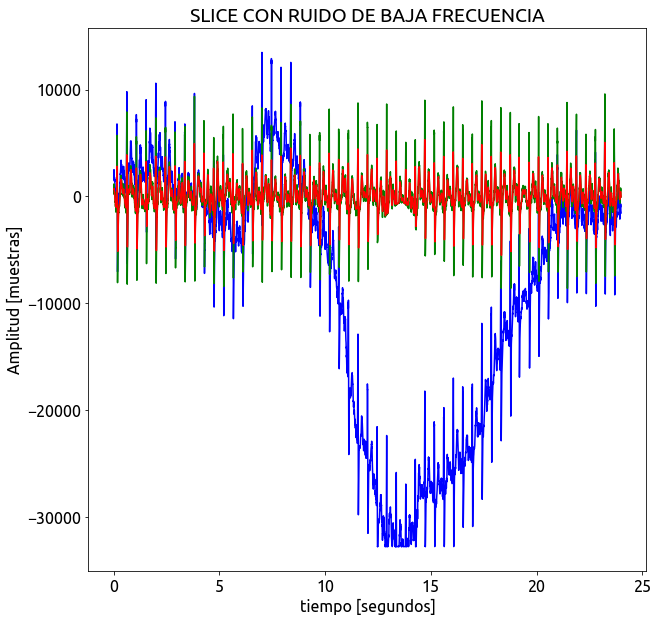

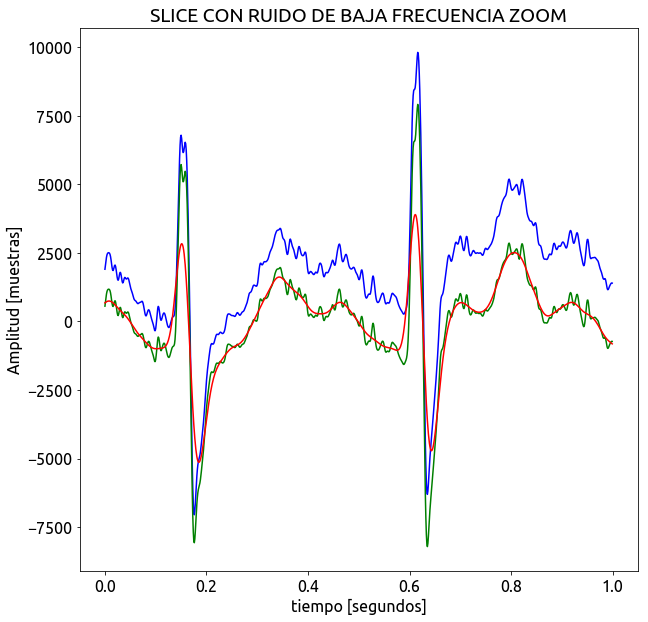

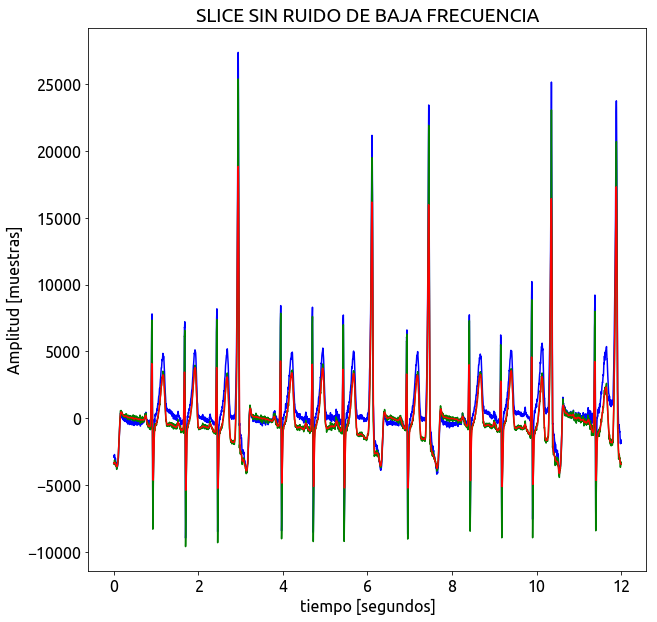

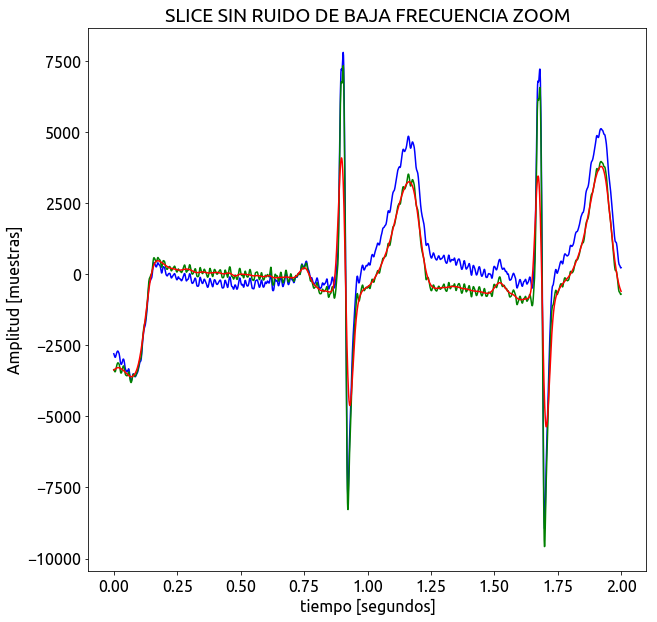

In [15]:
#Hacemos lo mismo con el filtro IIR que se diseño utilizando bessel y filt filt
#Cargamos el IIR PASA ALTOS
#Load high pass IIR
files = np.load('IIR_HIGHPASS-BESSEL.npz')
coefficient_hp=files['ba.npy']

#Load low pass IIR
files = np.load('IIR_LOWPASS-BESSEL.npz')
coefficient_lp=files['ba.npy']


b_hp = coefficient_hp[0].flatten()
a_hp = coefficient_hp[1].flatten()

b_lp = coefficient_lp[0].flatten()
a_lp = coefficient_lp[1].flatten()

#Filtramos con el HP
ecg_hp = signal.filtfilt(b_hp,a_hp,ecg)
#FIltramos la salida del filtrado del HP con el LP
ecg_hp_lp = signal.filtfilt(b_lp,a_lp,ecg_hp)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)


plot_slice(slice_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

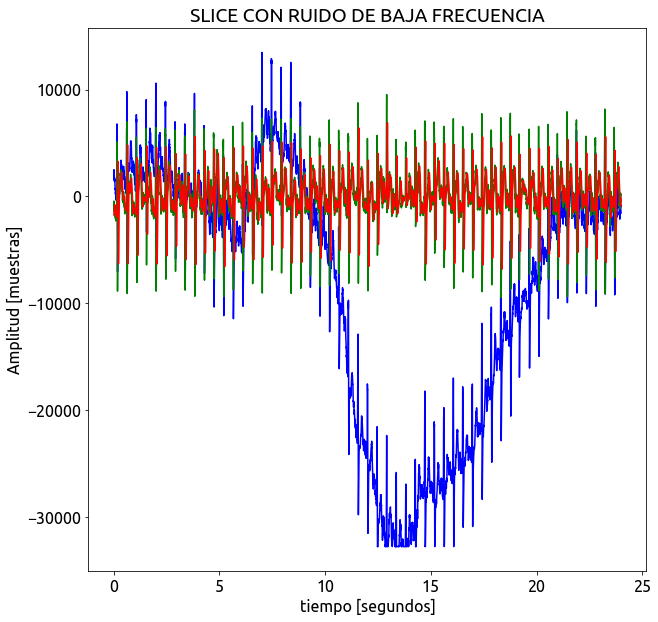

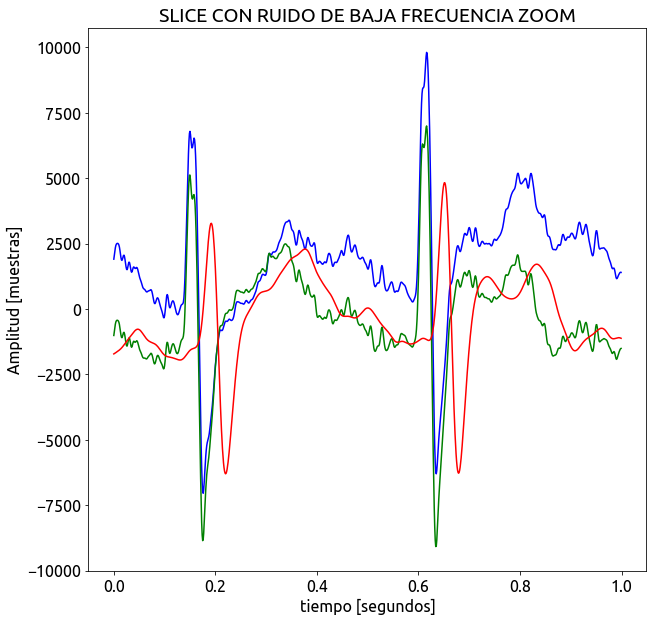

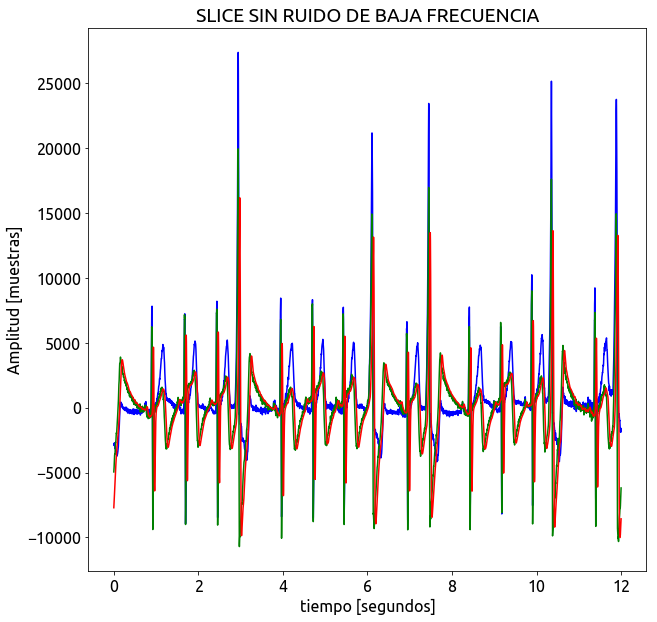

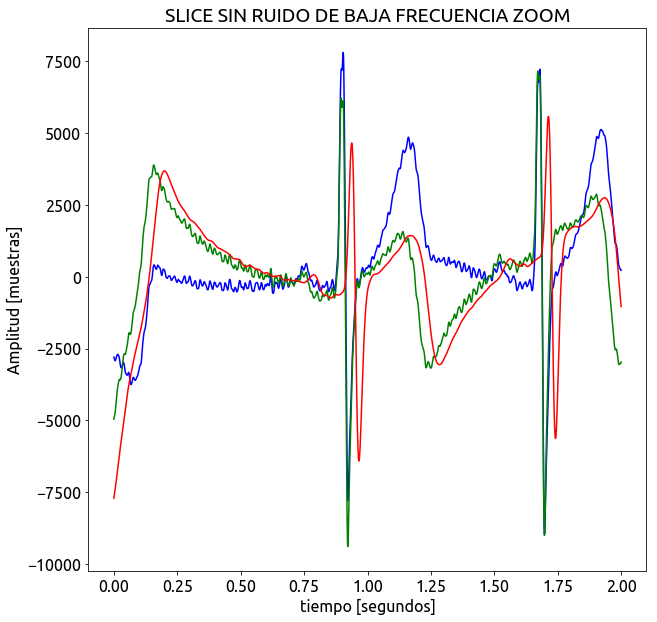

In [16]:
#Hacemos lo mismo con el filtro IIR que se diseño utilizando bessel y lfilter
#Cargamos el IIR PASA ALTOS
#Load high pass IIR
files = np.load('IIR_HIGHPASS-BESSEL.npz')
coefficient_hp=files['ba.npy']

#Load low pass IIR
files = np.load('IIR_LOWPASS-BESSEL.npz')
coefficient_lp=files['ba.npy']


b_hp = coefficient_hp[0].flatten()
a_hp = coefficient_hp[1].flatten()

b_lp = coefficient_lp[0].flatten()
a_lp = coefficient_lp[1].flatten()

#Filtramos con el HP
ecg_hp = signal.lfilter(b_hp,a_hp,ecg)
#FIltramos la salida del filtrado del HP con el LP
ecg_hp_lp = signal.lfilter(b_lp,a_lp,ecg_hp)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)


plot_slice(slice_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_hp,ecg_hp_lp)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Los dos filtros FIR se comportaron parecido su orden fue de alrededor de 2000 muestras cada uno, en cambios los IIR usando lfilter se rompio mucho mas la señal para el eliptico y menos para el de bessel. El orden con los filtros IIR fue del orden de 10 TAPS.
La eleccion del IIR eliptico es la forma mas optima ya que se soluciona el sistema con un orden muy bajo en el mundo de la frecuencia. Pero esta lleva a muchas alteracion en la fase de la señal, lo cual para una aplicacion que requiere la morgología de la señal es un incovniente. Una workaround para esto es hacer un doble filtrada, lo cual puede ser un incoveniente para un sistema en tiempo real.
Si se diseña el filtro IIR tomando una platilla de filtro de gauss/bessel con PYFDA no puede obtener un orden que cumpla con la plantilla, pero en caso de usar otra plantilla seguro el orden seria mayor que el eliptico pero su alteracion en fase seria menor.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

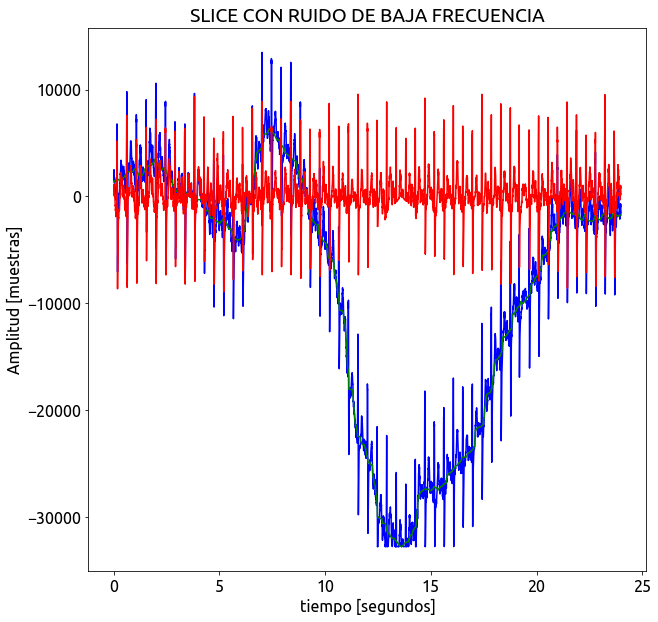

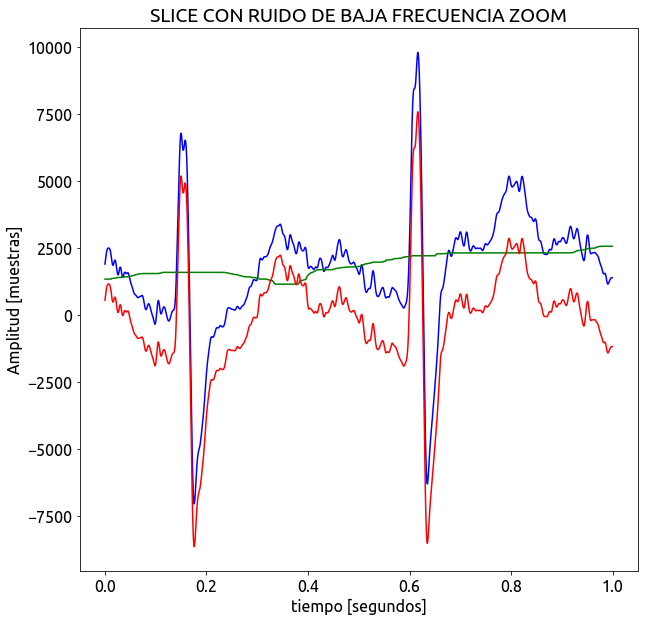

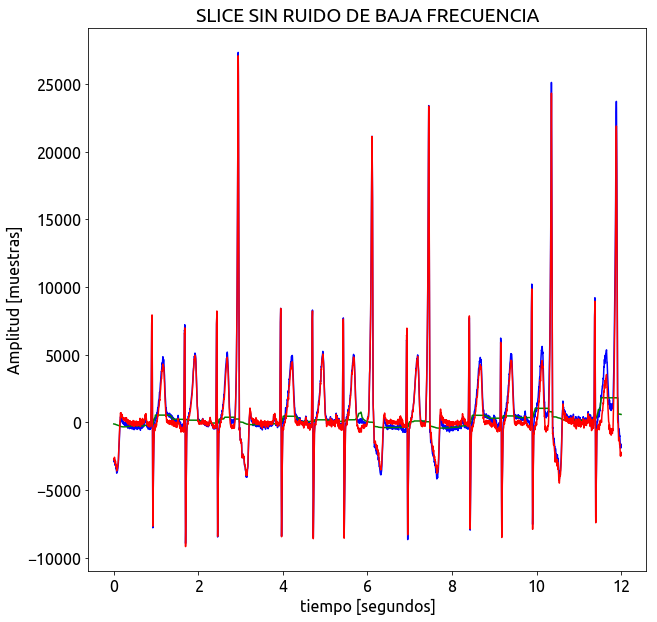

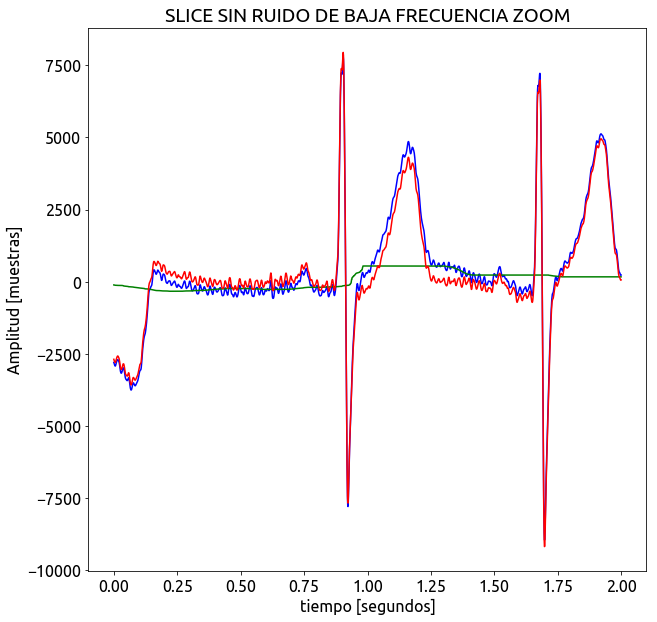

In [21]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Se prueba el filtro
zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)

#Hacemos lo que pide el enunciado hacem9os el fitlro de 200 muestras y luego de 601 a ese resultado
ecg_median_filter = signal.medfilt(ecg,201)
ecg_median_filter = signal.medfilt(ecg_median_filter ,601)

plot_slice(slice_baja_frec,ecg,ecg_median_filter ,ecg-ecg_median_filter)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA')
plt.show()


slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ecg_median_filter ,ecg-ecg_median_filter)
plt.title('SLICE CON RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()

#Ahora vamos a probar el Filtro en una zona sin ruido de baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)

plot_slice(slice_sin_baja_frec,ecg,ecg_median_filter ,ecg-ecg_median_filter)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA')
plt.show()

slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ecg_median_filter ,ecg-ecg_median_filter)
plt.title('SLICE SIN RUIDO DE BAJA FRECUENCIA ZOOM')
plt.show()




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Segun mi criterio por lo que veo afecta menos la zona de baja frecuencia que los filtros digitales diseñados. Anda bastante bien como pasaalto, para señales de muy baja drecuencia, y no creo que necesite tanta memoria como el FIR. O por lo menos eso si menos multiplicaciones va a necesitar. La generacion de un filtro pasabajo con una frecuencia muy baja de corte y una pendiente abrupta elevo muchisimo el orden.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

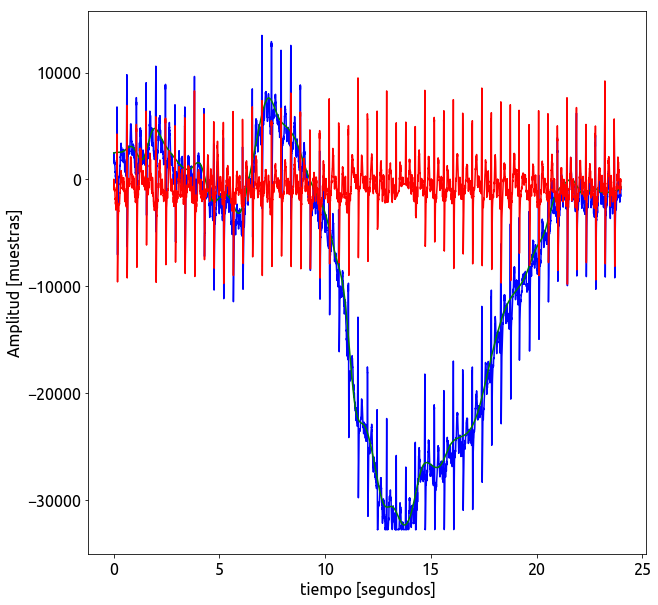

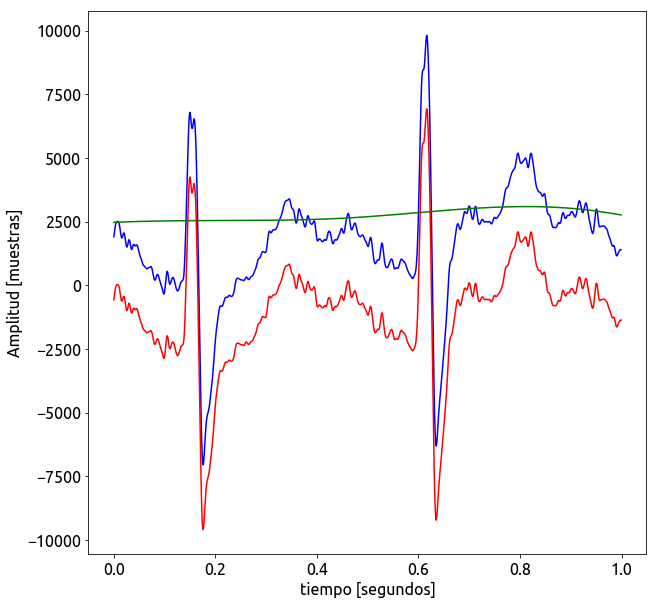

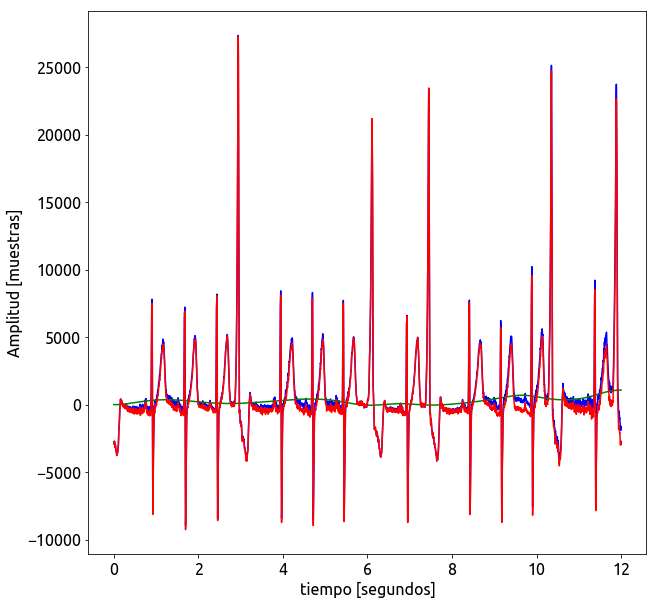

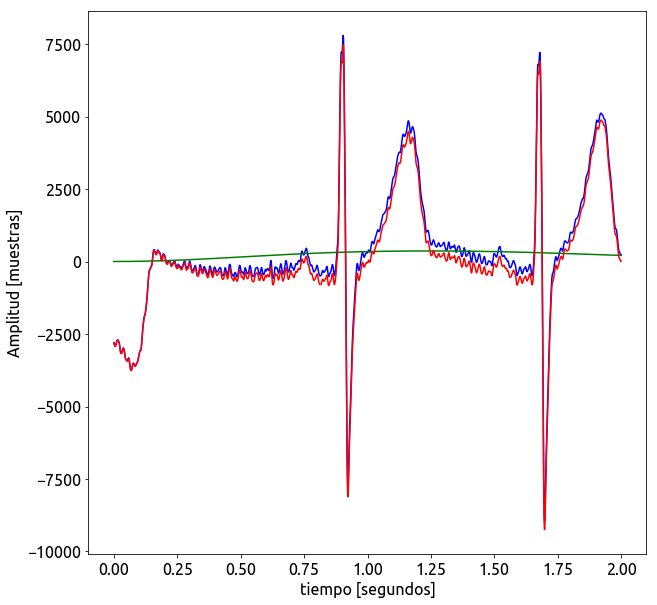

In [24]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Obtenemos la funcion para hacer el CubicsSpline
from scipy.interpolate import CubicSpline
#Hacemos nuestro filtros estimando la linea de base con 150 muestras antes
#150 ms se ve como un buen tiempo
delay = 150
base_line_y = np.zeros(np.size(qrs_detections)+1);
base_line_x = np.zeros(np.size(qrs_detections)+1);
for i in range (np.size(qrs_detections)):
    base_line_y[i] = ecg[qrs_detections[i]-delay]
    base_line_x[i] = qrs_detections[i]-delay

#Hay que poner el ultimo punto para el ECG para que funcione el interpolado y quede del mismo 
#tamaño
base_line_x[-1] = np.size(ecg)
base_line_y[-1] = ecg[-1]

#Lo pasamos a int para que pueda usarse para indexar, ademas este lo pide la funcion
#de cubicspline
base_line_x = base_line_x.astype(int)

#Hacemos la interpolacion
cs = CubicSpline(base_line_x, base_line_y)

#Obtenemos un vector lineal para poder hacer la linea de base
N = np.size(ecg);
xs = np.arange(0,N,1)

#Linea de base sacada como la interpolacion cubica del muestreo.
ys = cs(xs)

#Analisis de una seccion con ruido baja frecuencia
slice_baja_frec = zonas_con_interf_baja_frec[0].astype(int)
plot_slice(slice_baja_frec,ecg,ys ,ecg-ys)

#Hacemos un zoom para ver que tan bien da
slice_baja_frec_zoom = [slice_baja_frec[0],slice_baja_frec[0]+1000]
plot_slice(slice_baja_frec_zoom,ecg,ys ,ecg-ys)

#Analisis de una seccion sinuido baja frecuencia
slice_sin_baja_frec     =  zonas_sin_interf[0].astype(int)
plot_slice(slice_sin_baja_frec,ecg,ys ,ecg-ys)

#Hacemos un zoom para ver que tan bien da
slice_sin_baja_frec_zoom = [slice_sin_baja_frec[0],slice_sin_baja_frec[0]+2000]
plot_slice(slice_sin_baja_frec_zoom,ecg,ys ,ecg-ys)


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Vemos que esto funciona tan bien como el filtro de mediana, prefiero la ultima opcion, parece que da mejor, pero la diferencia es indistinguible. Los saltyos en la sección Q del ECG.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

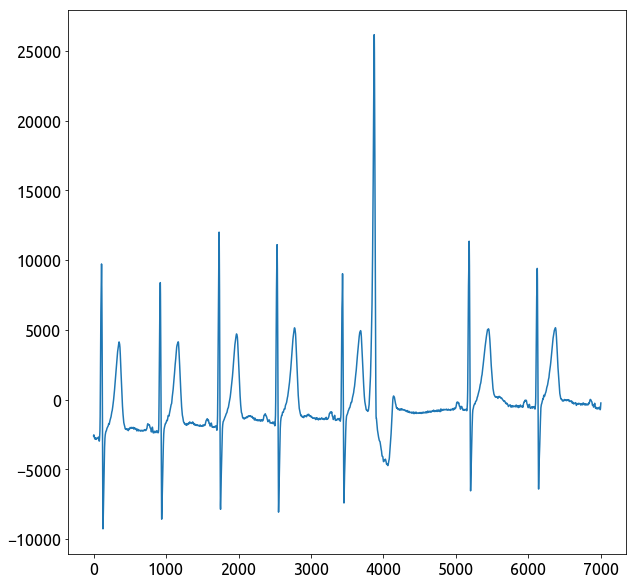

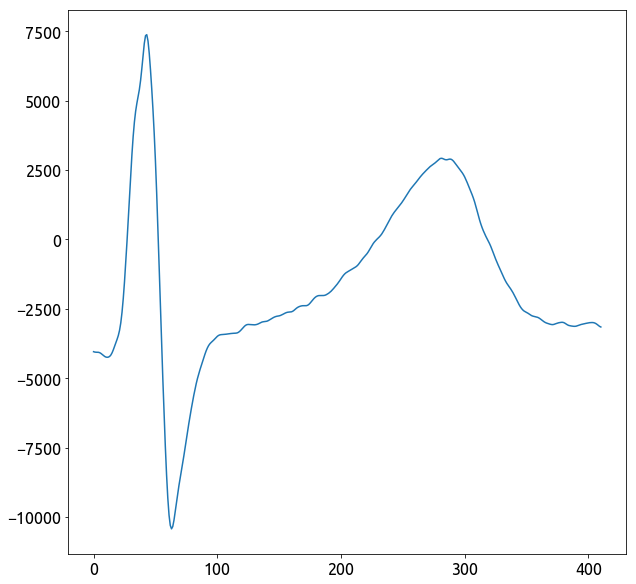

In [19]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Haciendo la correlacion con la señal patron, con este metodo podemos distinguir los buenos pulsos y los malos pulsos. Tambien podemos hacerlo mismo con el patron ventricular. Probemos hacerlos con las 3 señales dadas como patrones.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [20]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

